In [1]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Apple (AAPL) and the date range
symbol = "AAPL"
start_date = "2022-10-12"
end_date = "2023-10-12"

# Fetch the data
apple_data = yf.download(symbol, start=start_date, end=end_date)

# Display the data
print(apple_data)


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-12  139.130005  140.360001  138.160004  138.339996  137.524155   
2022-10-13  134.990005  143.589996  134.369995  142.990005  142.146744   
2022-10-14  144.309998  144.520004  138.190002  138.380005  137.563934   
2022-10-17  141.070007  142.899994  140.270004  142.410004  141.570145   
2022-10-18  145.490005  146.699997  140.610001  143.750000  142.902237   
...                ...         ...         ...         ...         ...   
2023-10-05  173.789993  175.449997  172.679993  174.910004  174.910004   
2023-10-06  173.800003  177.990005  173.179993  177.490005  177.490005   
2023-10-09  176.809998  179.050003  175.800003  178.990005  178.990005   
2023-10-10  178.100006  179.720001  177.949997  178.389999  178.389999   
2023-10-11  178.199997  179.380005  177.600

In [2]:


# Display the first 5 rows of the DataFrame
print(apple_data.head())

# Check for missing values
missing_values = apple_data.isnull().sum()

# Handle missing values if necessary
# For example, you can fill missing values with the previous day's value
apple_data = apple_data.fillna(method='ffill')

# You can also drop rows with missing values using apple_data.dropna()

# Verify that missing values have been handled
missing_values_after_handling = apple_data.isnull().sum()
print("Missing values after handling:")
print(missing_values_after_handling)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-12  139.130005  140.360001  138.160004  138.339996  137.524155   
2022-10-13  134.990005  143.589996  134.369995  142.990005  142.146744   
2022-10-14  144.309998  144.520004  138.190002  138.380005  137.563934   
2022-10-17  141.070007  142.899994  140.270004  142.410004  141.570145   
2022-10-18  145.490005  146.699997  140.610001  143.750000  142.902237   

               Volume  
Date                   
2022-10-12   70433700  
2022-10-13  113224000  
2022-10-14   88598000  
2022-10-17   85250900  
2022-10-18   99136600  
Missing values after handling:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Mean Close Price: 163.02
Median Close Price: 165.02
Standard Deviation of Close Price: 18.95


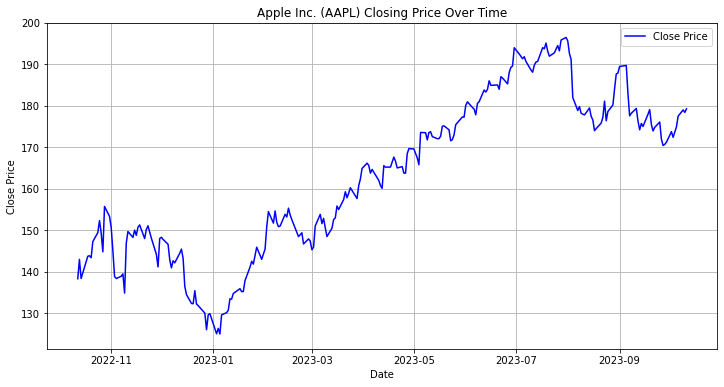

In [3]:
import matplotlib.pyplot as plt

# Calculate basic statistics for 'Close' price
close_price = apple_data['Close']
mean_close = close_price.mean()
median_close = close_price.median()
std_dev_close = close_price.std()

# Display the basic statistics
print(f"Mean Close Price: {mean_close:.2f}")
print(f"Median Close Price: {median_close:.2f}")
print(f"Standard Deviation of Close Price: {std_dev_close:.2f}")

# Create a line plot of 'Close' price over time
plt.figure(figsize=(12, 6))
plt.plot(apple_data.index, close_price, label='Close Price', color='blue')
plt.title('Apple Inc. (AAPL) Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Display the line plot
plt.show()


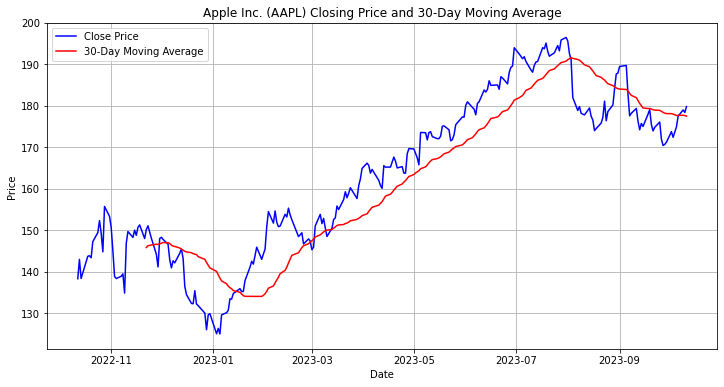

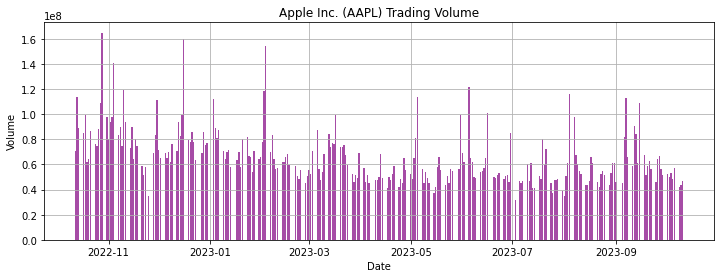

In [8]:
# Calculate the 30-day moving average of the 'Close' price
window = 30
apple_data['Close_MA_30'] = apple_data['Close'].rolling(window=window).mean()

# Create a line plot of 'Close' price and its 30-day moving average
plt.figure(figsize=(12, 6))
plt.plot(apple_data.index, apple_data['Close'], label='Close Price', color='blue')
plt.plot(apple_data.index, apple_data['Close_MA_30'], label='30-Day Moving Average', color='red')
plt.title('Apple Inc. (AAPL) Closing Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Volume Analysis (Plot the trading volume)
plt.figure(figsize=(12, 4))
plt.bar(apple_data.index, apple_data['Volume'], color='purple', alpha=0.7)
plt.title('Apple Inc. (AAPL) Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)

# Display the plots
plt.show()


Average Daily Trading Volume: 65910682.17


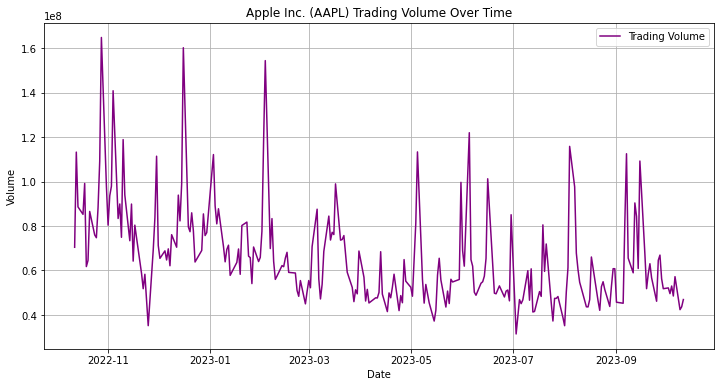

In [9]:
# Calculate the average daily trading volume
average_volume = apple_data['Volume'].mean()
print(f"Average Daily Trading Volume: {average_volume:.2f}")

# Create a line plot of trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(apple_data.index, apple_data['Volume'], label='Trading Volume', color='purple')
plt.title('Apple Inc. (AAPL) Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


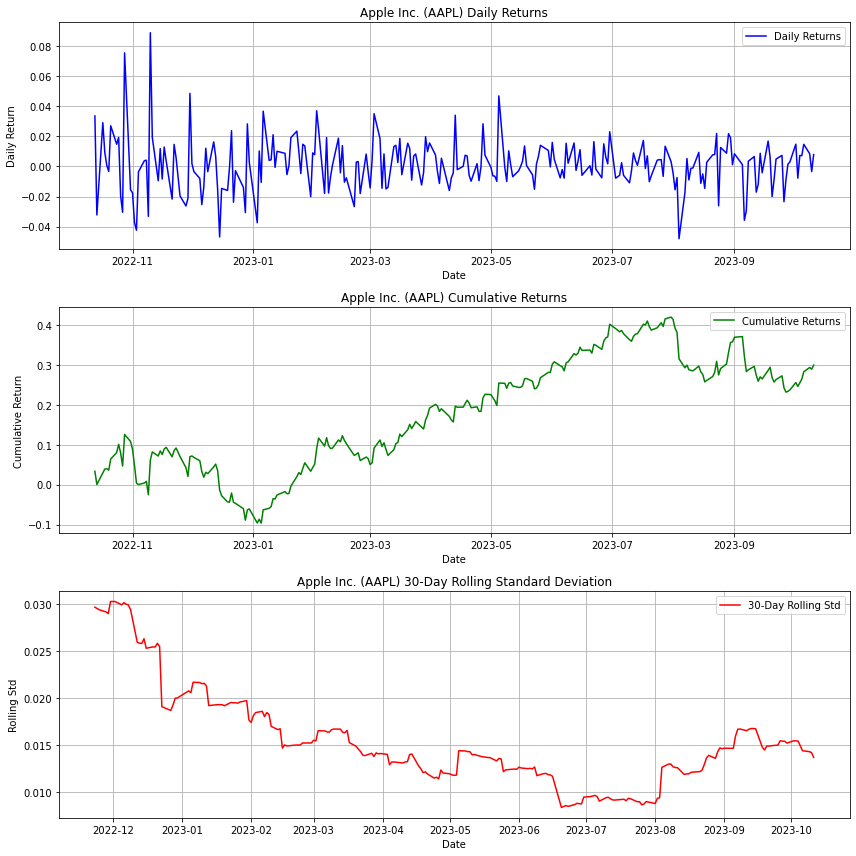

In [10]:

# Calculate daily returns
apple_data['Daily_Return'] = apple_data['Close'].pct_change()

# Calculate cumulative returns
apple_data['Cumulative_Return'] = (1 + apple_data['Daily_Return']).cumprod() - 1

# Calculate rolling standard deviation of daily returns
rolling_window = 30
apple_data['Rolling_Std'] = apple_data['Daily_Return'].rolling(window=rolling_window).std()

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

# Plot daily returns
ax1.plot(apple_data.index, apple_data['Daily_Return'], label='Daily Returns', color='blue')
ax1.set_title('Apple Inc. (AAPL) Daily Returns')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Return')
ax1.legend()
ax1.grid(True)

# Plot cumulative returns
ax2.plot(apple_data.index, apple_data['Cumulative_Return'], label='Cumulative Returns', color='green')
ax2.set_title('Apple Inc. (AAPL) Cumulative Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Return')
ax2.legend()
ax2.grid(True)

# Plot rolling standard deviation of daily returns
ax3.plot(apple_data.index, apple_data['Rolling_Std'], label=f'{rolling_window}-Day Rolling Std', color='red')
ax3.set_title(f'Apple Inc. (AAPL) {rolling_window}-Day Rolling Standard Deviation')
ax3.set_xlabel('Date')
ax3.set_ylabel('Rolling Std')
ax3.legend()
ax3.grid(True)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


[*********************100%***********************]  1 of 1 completed


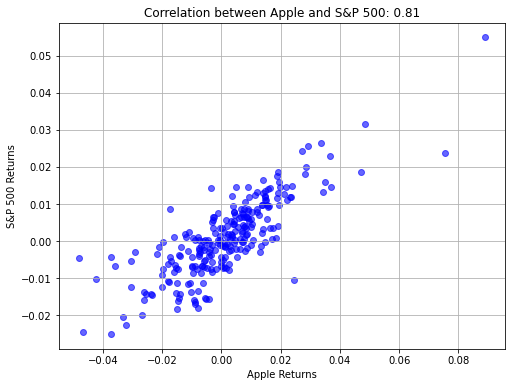

In [12]:

symbol_spy = "SPY"

# Define the date range
start_date = "2022-10-12"
end_date = "2023-10-12"

# Fetch data for S&P 500

spy_data = yf.download(symbol_spy, start=start_date, end=end_date)

# Calculate daily returns for both Apple and S&P 500
apple_data['Apple_Return'] = apple_data['Close'].pct_change()
spy_data['SPY_Return'] = spy_data['Close'].pct_change()

# Merge the two DataFrames on the 'Date' column
combined_data = pd.merge(apple_data, spy_data, on='Date', how='inner')

# Calculate the correlation between the returns
correlation = combined_data['Apple_Return'].corr(combined_data['SPY_Return'])

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(combined_data['Apple_Return'], combined_data['SPY_Return'], color='blue', alpha=0.6)
plt.title(f'Correlation between Apple and S&P 500: {correlation:.2f}')
plt.xlabel('Apple Returns')
plt.ylabel('S&P 500 Returns')
plt.grid(True)

# Display the scatter plot
plt.show()


From the price movement, we can clearly see that Apple stock price has shown continuosly upward movement except for in the month of January 2023. 30 day moving average followed along.
The trading volume shows that in December 2022 and January 2023, the volume was higher compared to the rest of the time period when it kind of stabilised.In aggregate terms, trading volume was still high. 
The daily returns were also very volatile during December 2022 and January 2023. It also stabilised after that. 
Moreover, it also shoed strong correlation with the S&P index price movement.